In [1]:
import sys
sys.path.insert(0, '../src')

In [12]:
import re

import numpy as np
import pandas as pd

In [3]:
from felix_ml_tools import macgyver as mg

In [4]:
from utils import *

In [6]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [7]:
uf = 'PB'

# Intro

Ingesting some base data

In [17]:
ibge_municipio = pd.read_parquet('../data/ibge_municipio_pib.parquet')

ibge_municipio['municipioCodigo'] = ibge_municipio['municipioCodigo'].astype(str)
ibge_municipio['municipioCodigo6d'] = ibge_municipio['municipioCodigo'].str.slice(0, 6)

ibge_municipio['nomeMunicipioNorm'] = ibge_municipio['nomeMunicipio'].apply(replace_accents)
ibge_municipio['nomeMunicipioNorm'] = ibge_municipio['nomeMunicipioNorm'].apply(lambda x: re.sub(r"[^a-zA-Z\d\_]+", " ", x))
ibge_municipio['nomeMunicipioNorm'] = ibge_municipio['nomeMunicipioNorm'].str.upper()

ibge_municipio = ibge_municipio[['uf', 'ufCodigo', 'nomeUf', 'nomeMunicipio', 'nomeMunicipioNorm', 'municipioCodigo', 'municipioCodigo6d']]
ibge_municipio = ibge_municipio.drop_duplicates()

inspect(ibge_municipio);

shape: (5570, 7)
columns: ['uf', 'ufCodigo', 'nomeUf', 'nomeMunicipio', 'nomeMunicipioNorm', 'municipioCodigo', 'municipioCodigo6d']


,uf,ufCodigo,nomeUf,nomeMunicipio,nomeMunicipioNorm,municipioCodigo,municipioCodigo6d
0,RO,11,Rondônia,Alta Floresta D'Oeste,ALTA FLORESTA D OESTE,1100015,110001
1,RO,11,Rondônia,Ariquemes,ARIQUEMES,1100023,110002
2,RO,11,Rondônia,Cabixi,CABIXI,1100031,110003
3,RO,11,Rondônia,Cacoal,CACOAL,1100049,110004
4,RO,11,Rondônia,Cerejeiras,CEREJEIRAS,1100056,110005


In [19]:
rais_caged_cnpj = inspect(
    pd.read_parquet('../data/rais_caged_cnpj.parquet')
    .merge(ibge_municipio.rename(columns={'uf': 'enderecoUf', 'nomeMunicipioNorm': 'enderecoMunicipio'}), on=['enderecoUf', 'enderecoMunicipio'])
)

shape: (22832693, 10)
columns: ['cnpj', 'ano', 'funcionarios', 'enderecoUf', 'enderecoMunicipio', 'ufCodigo', 'nomeUf', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d']


,cnpj,ano,funcionarios,enderecoUf,enderecoMunicipio,ufCodigo,nomeUf,nomeMunicipio,municipioCodigo,municipioCodigo6d
0,00000000066370,2010,6,SP,SAO PAULO,35,São Paulo,São Paulo,3550308,355030
1,00000000066370,2011,7,SP,SAO PAULO,35,São Paulo,São Paulo,3550308,355030
2,00000000066370,2012,8,SP,SAO PAULO,35,São Paulo,São Paulo,3550308,355030
3,00000000066370,2013,9,SP,SAO PAULO,35,São Paulo,São Paulo,3550308,355030
4,00000000066370,2014,11,SP,SAO PAULO,35,São Paulo,São Paulo,3550308,355030


In [22]:
ibge_municipio_pib = pd.read_parquet('../data/ibge_municipio_pib.parquet')
ibge_municipio_pib['municipioCodigo'] = ibge_municipio_pib['municipioCodigo'].astype(str)
ibge_municipio_pib['municipioCodigo6d'] = ibge_municipio_pib['municipioCodigo'].str.slice(0, 6)

inspect(ibge_municipio_pib);

shape: (5570, 18)
columns: ['uf', 'ufCodigo', 'nomeUf', 'nomeMunicipio', 'municipioCodigo', 'valorBrutoAgropecuraria1000', 'valorBrutoIndustria1000', 'valorBrutoServicos1000', 'valorBrutoUtilidade1000', 'valorBruto1000', 'impostosProdutos1000', 'pib1000', 'pibPerCapita', 'atividadeMaisRelevanteValorBruto1', 'atividadeMaisRelevanteValorBruto2', 'atividadeMaisRelevanteValorBruto3', 'ano', 'municipioCodigo6d']


,uf,ufCodigo,nomeUf,nomeMunicipio,municipioCodigo,valorBrutoAgropecuraria1000,valorBrutoIndustria1000,valorBrutoServicos1000,valorBrutoUtilidade1000,valorBruto1000,impostosProdutos1000,pib1000,pibPerCapita,atividadeMaisRelevanteValorBruto1,atividadeMaisRelevanteValorBruto2,atividadeMaisRelevanteValorBruto3,ano,municipioCodigo6d
0,RO,11,Rondônia,Alta Floresta D'Oeste,1100015,169623,27805,117717,154926,470072,28793,498864,19612,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços\r,2017,110001
1,RO,11,Rondônia,Ariquemes,1100023,165217,330319,933935,634591,2064062,232012,2296074,21390,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,2017,110002
2,RO,11,Rondônia,Cabixi,1100031,63022,4797,22431,43150,133399,5494,138894,22316,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária","Agricultura, inclusive apoio à agricultura e a...",2017,110003
3,RO,11,Rondônia,Cacoal,1100049,255060,224595,908665,521368,1909689,217835,2127523,24038,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,2017,110004
4,RO,11,Rondônia,Cerejeiras,1100056,61940,22170,192882,107819,384811,63713,448524,25010,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,2017,110005


In [23]:
ibge_municipio_populacao_estimada = pd.read_parquet('../data/ibge_municipio_populacao_estimada.parquet')
ibge_municipio_populacao_estimada['municipioCodigo'] = ibge_municipio_populacao_estimada['municipioCodigo'].astype(str)
ibge_municipio_populacao_estimada['municipioCodigo'] = ibge_municipio_populacao_estimada['municipioCodigo'].str.pad(5, fillchar='0')
ibge_municipio_populacao_estimada['municipioCodigo'] = (
    ibge_municipio_populacao_estimada['ufCodigo'].astype(str) + ibge_municipio_populacao_estimada['municipioCodigo']
)
ibge_municipio_populacao_estimada['municipioCodigo6d'] = ibge_municipio_populacao_estimada['municipioCodigo'].str.slice(0, 6)
inspect(ibge_municipio_populacao_estimada);

shape: (5570, 7)
columns: ['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'populacaoEstimada', 'ano', 'municipioCodigo6d']


,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,ano,municipioCodigo6d
0,RO,11,Alta Floresta D'Oeste,1100015,22945.000,2020,110001
1,RO,11,Ariquemes,1100023,107863.000,2020,110002
2,RO,11,Cabixi,1100031,5312.000,2020,110003
3,RO,11,Cacoal,1100049,85359.000,2020,110004
4,RO,11,Cerejeiras,1100056,16323.000,2020,110005


In [24]:
ibge_setor_censo_basico = pd.read_parquet('../data/ibge_setor_censo_basico.parquet')
ibge_setor_censo_basico['codigoMunicipio'] = ibge_setor_censo_basico['codigoMunicipio'].astype(str)
ibge_setor_censo_basico['codigoMunicipio6d'] = ibge_setor_censo_basico['codigoMunicipio'].str.slice(0, 6)
ibge_setor_censo_basico = ibge_setor_censo_basico.drop(columns=['nomeUf', 'nomeMunicipio'])
inspect(ibge_setor_censo_basico);

shape: (310082, 36)
columns: ['codigoSetor', 'codigoGrandeRegiao', 'nomeGrandeRegiao', 'codigoUf', 'codigoMesoRegiao', 'nomeMesoRegiao', 'codigoMicroRegiao', 'nomeMicroRegiao', 'codigoRegiaoMetropolitana', 'nomeRegiaoMetropolitana', 'codigoMunicipio', 'codigoDistrito', 'nomeDistrito', 'codigoSubdistrito', 'nomeSubdistrito', 'codigoBairro', 'nomeBairro', 'situacaoSetor', 'tipoSetor', 'domicilios', 'moradores', 'mediaMoradoresDomicilios', 'varianciaMoradoresDomicilios', 'rendaMediaMensalMoradores', 'varianciaRendaMediaMensalMoradores', 'rendaMediaMensalMoradoresAssalariados', 'varianciaRendaMediaMensalMoradoresAssalariados', 'rendaMediaMensalMoradoresAcima10Anos', 'varianciaRendaMediaMensalMoradoresAcima10Anos', 'rendaMediaMensalMoradoresAcima10AnosAssalariados', 'varianciaRendaMediaMensalMoradoresAcima10AnosAssalariados', 'urbano', 'rural', 'metropolitano', 'siglaUf', 'codigoMunicipio6d']


,codigoSetor,codigoGrandeRegiao,nomeGrandeRegiao,codigoUf,codigoMesoRegiao,nomeMesoRegiao,codigoMicroRegiao,nomeMicroRegiao,codigoRegiaoMetropolitana,nomeRegiaoMetropolitana,codigoMunicipio,codigoDistrito,nomeDistrito,codigoSubdistrito,nomeSubdistrito,codigoBairro,nomeBairro,situacaoSetor,tipoSetor,domicilios,moradores,mediaMoradoresDomicilios,varianciaMoradoresDomicilios,rendaMediaMensalMoradores,varianciaRendaMediaMensalMoradores,rendaMediaMensalMoradoresAssalariados,varianciaRendaMediaMensalMoradoresAssalariados,rendaMediaMensalMoradoresAcima10Anos,varianciaRendaMediaMensalMoradoresAcima10Anos,rendaMediaMensalMoradoresAcima10AnosAssalariados,varianciaRendaMediaMensalMoradoresAcima10AnosAssalariados,urbano,rural,metropolitano,siglaUf,codigoMunicipio6d
0,172210705000007,1,Regio Norte,17,1701,Ocidental do Tocantins,17002,Araguana,0,Municpios no pertencentes a estrutura de RM,1722107,172210705,XAMBIO,17221070500,XAMBIO,1722107000,XAMBIO (todos os setores),1,0,200.000,696.000,3.480,2.880,1428.280,7479003.290,1660.780,8315228.320,799.950,4353803.010,1369.360,6679874.820,True,False,True,TO,172210
1,172210705000012,1,Regio Norte,17,1701,Ocidental do Tocantins,17002,Araguana,0,Municpios no pertencentes a estrutura de RM,1722107,172210705,XAMBIO,17221070500,XAMBIO,1722107000,XAMBIO (todos os setores),5,0,51.000,186.000,3.650,3.230,436.590,48399.250,494.800,25541.350,230.580,67880.830,430.820,40199.910,False,True,True,TO,172210
2,172210705000017,1,Regio Norte,17,1701,Ocidental do Tocantins,17002,Araguana,0,Municpios no pertencentes a estrutura de RM,1722107,172210705,XAMBIO,17221070500,XAMBIO,1722107000,XAMBIO (todos os setores),8,8,63.000,222.000,3.520,3.190,338.250,201259.810,519.760,215257.440,186.770,126269.490,470.750,185390.270,False,True,True,TO,172210
3,130260305100011,1,Regio Norte,13,1303,Centro Amazonense,13007,Manaus,01,RM Manaus,1302603,130260305,MANAUS,13026030510,QUINTA R.A.,1302603030,Crespo,1,0,239.000,858.000,3.590,4.580,596.630,409818.280,792.190,389111.090,477.390,369008.550,785.700,365076.790,True,False,True,AM,130260
4,130260305120424,1,Regio Norte,13,1303,Centro Amazonense,13007,Manaus,01,RM Manaus,1302603,130260305,MANAUS,13026030512,STIMA R.A.,1302603058,Novo Aleixo,1,0,213.000,866.000,4.070,4.100,782.960,906966.390,947.560,941864.900,409.390,459029.440,799.000,584943.550,True,False,True,AM,130260


In [25]:
ibge_municipio.rename(columns={'municipioCodigo6d': 'codmunocor'}).head()

,uf,ufCodigo,nomeUf,nomeMunicipio,nomeMunicipioNorm,municipioCodigo,codmunocor
0,RO,11,Rondônia,Alta Floresta D'Oeste,ALTA FLORESTA D OESTE,1100015,110001
1,RO,11,Rondônia,Ariquemes,ARIQUEMES,1100023,110002
2,RO,11,Rondônia,Cabixi,CABIXI,1100031,110003
3,RO,11,Rondônia,Cacoal,CACOAL,1100049,110004
4,RO,11,Rondônia,Cerejeiras,CEREJEIRAS,1100056,110005


## Target Population

Ingest dataset to define target population

In [26]:
sim_pf_homcidios = pd.read_csv(
    '../data/1. SIM (Homicidios)/DadosHomicidios_2013-18_SIM.csv',
    dtype={'dtnasc': str},
    low_memory=False
)

sim_pf_homcidios.columns = sim_pf_homcidios.columns.str.lower()

sim_pf_homcidios['codmunocor'] = sim_pf_homcidios['codmunocor'].astype(str)

# sim_pf_homcidios['dtnasc'] = sim_pf_homcidios['dtnasc'].astype(int).astype(str).pad(8, fillchar='0')

# Data em que occoreu o óbito
sim_pf_homcidios['dtobito'] = pd.to_datetime((sim_pf_homcidios['dtobito'].astype(int).astype(str)).str.pad(8, fillchar='0'), format='%d%m%Y')

# Horário do óbito.
sim_pf_homcidios['horaobito'] = sim_pf_homcidios['horaobito'].fillna(-9999)
sim_pf_homcidios['horaobito'] = (sim_pf_homcidios['horaobito'].astype(int).astype(str)).str.pad(4, fillchar='0')
sim_pf_homcidios['horaobito'] = (sim_pf_homcidios['horaobito'].str.slice(0, 2).astype(int) * 60 + sim_pf_homcidios['horaobito'].str.slice(2, 4).astype(int))/float(60)
sim_pf_homcidios['horaobito'] = np.where(sim_pf_homcidios['horaobito'] < 0, np.nan, sim_pf_homcidios['horaobito'])

# Tipo de morte violenta ou circunstâncias em que se deu a morte não  natural
circobito_map = {1: "acidente", 2: "suicídio", 3: "homicídio", 4: "outros", 9: "ignorado"}

# Sexo do falecido
sexo_map = {0: "ignorado", 1: "masculino", 2: "feminino"}

# Cor informada pelo responsável pelas informações do falecido.
racacor_map = {1: "Branca", 2: "Preta", 3: "Amarela", 4: "Parda", 5: "Indígena"}

# Local de ocorrência do óbito.
lococor_map = {
    1: "hospital", 2: "outros estabelecimentos de saúde", 3: "domicílio",
    4: "via pública", 5: "outros", 6: "aldeia indígena", 9: "ignorado"
}

# Se refere ao atendimento médico continuado que o paciente recebeu,  ou não , durante a enfermidade que ocasionou o óbito.
assistmed_map = {1: "sim", 2: "não", 9: "ignorado"}

# col maps
sim_pf_homcidios = sim_pf_homcidios.replace({
    "circobito": circobito_map,
    "sexo": sexo_map,
    "racacor": racacor_map,
    "lococor": lococor_map,
    "assistmed": assistmed_map,
})

# map UFs
sim_pf_homcidios = (
    sim_pf_homcidios
    .merge(ibge_municipio.rename(columns={'municipioCodigo6d': 'codmunocor'}), on='codmunocor')
)

# O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto, se 2 = hora, se 3 = mês, se 4 = ano,  se = 5 idade maior que 100 anos)
# Anos - subcampo varia de 00 a 99; - 9 - ignorado)
# Homicídios de Jovens (15 a 29 anos)
sim_pf_homcidios = sim_pf_homcidios[(sim_pf_homcidios['idade'] >= 400) & (sim_pf_homcidios['idade'] < 500)]
sim_pf_homcidios['idade'] = (sim_pf_homcidios['idade'].astype(str).str.slice(1, 3)).astype(int)
sim_pf_homcidios = sim_pf_homcidios[(sim_pf_homcidios['idade'] >= 15) & (sim_pf_homcidios['idade'] < 30)]

# considerando apenas homicídios
sim_pf_homcidios = sim_pf_homcidios[sim_pf_homcidios['circobito'] == 'homicídio']

# removendo variaveis com preenchimento muito baixo (<20%)
sim_pf_homcidios_fill_rate = mg.fill_rate(sim_pf_homcidios)
sim_pf_homcidios_low_fill_rate_cols = sim_pf_homcidios_fill_rate[sim_pf_homcidios_fill_rate['Fill (%)'] < 20]['Variable'].tolist()
sim_pf_homcidios_cols = [i for i in sim_pf_homcidios.columns.tolist() if i not in sim_pf_homcidios_low_fill_rate_cols]
sim_pf_homcidios = sim_pf_homcidios[sim_pf_homcidios_cols]

# numerolote, contador, linhac

inspect(sim_pf_homcidios);

shape: (182444, 54)
columns: ['contador', 'origem', 'tipobito', 'dtobito', 'horaobito', 'natural', 'dtnasc', 'idade', 'sexo', 'racacor', 'estciv', 'esc', 'esc2010', 'seriescfal', 'ocup', 'codmunres', 'lococor', 'codestab', 'codmunocor', 'assistmed', 'necropsia', 'linhaa', 'linhab', 'linhac', 'causabas', 'comunsvoim', 'dtatestado', 'circobito', 'fonte', 'tppos', 'dtinvestig', 'causabas_o', 'dtcadastro', 'atestante', 'fonteinv', 'dtrecebim', 'difdata', 'stdoepidem', 'stdonova', 'codmunnatu', 'numerolote', 'stcodifica', 'codificado', 'versaosist', 'versaoscb', 'atestado', 'dtrecoriga', 'escfalagr1', 'uf', 'ufCodigo', 'nomeUf', 'nomeMunicipio', 'nomeMunicipioNorm', 'municipioCodigo']


,contador,origem,tipobito,dtobito,horaobito,natural,dtnasc,idade,sexo,racacor,estciv,esc,esc2010,seriescfal,ocup,codmunres,lococor,codestab,codmunocor,assistmed,necropsia,linhaa,linhab,linhac,causabas,comunsvoim,dtatestado,circobito,fonte,tppos,dtinvestig,causabas_o,dtcadastro,atestante,fonteinv,dtrecebim,difdata,stdoepidem,stdonova,codmunnatu,numerolote,stcodifica,codificado,versaosist,versaoscb,atestado,dtrecoriga,escfalagr1,uf,ufCodigo,nomeUf,nomeMunicipio,nomeMunicipioNorm,municipioCodigo
0,49,1,2,2013-06-30,5.000,NaN,9101987.000,25,masculino,Branca,5.000,3.000,2.000,NaN,NaN,120035,hospital,2001594.000,120035,NaN,NaN,*X990,NaN,NaN,X990,NaN,NaN,homicídio,3.000,NaN,NaN,X990,14082013.000,NaN,NaN,31012014.000,45.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,12,Acre,Marechal Thaumaturgo,MARECHAL THAUMATURGO,1200351
2,1077,1,2,2015-10-22,17.000,812.000,4101987.000,28,feminino,Branca,2.000,2.000,1.000,NaN,999992.000,120035,domicílio,NaN,120035,não,2.000,*X940,NaN,NaN,X940,NaN,22102015.000,homicídio,1.000,N,NaN,X940,30102015.000,5.000,NaN,30102015.000,8.000,0.000,1.000,120035.000,20150014.000,S,S,3.2.00,3.200,X940,30102015.000,10.000,AC,12,Acre,Marechal Thaumaturgo,MARECHAL THAUMATURGO,1200351
4,3385,1,2,2016-11-29,2.000,812.000,30081987.000,29,masculino,Branca,1.000,4.000,3.000,3.000,NaN,120035,hospital,2001594.000,120035,sim,2.000,*R571,*X994,NaN,X994,NaN,29112016.000,homicídio,3.000,N,NaN,X994,16122016.000,5.000,NaN,16122016.000,17.000,0.000,1.000,120035.000,20160019.000,S,S,3.2.00,3.200,R571/X994,16122016.000,6.000,AC,12,Acre,Marechal Thaumaturgo,MARECHAL THAUMATURGO,1200351
5,267,1,2,2013-04-28,17.083,NaN,29011991.000,22,feminino,Parda,5.000,3.000,1.000,4.000,999992.000,120030,outros,NaN,120030,não,2.000,*Y004,*S061,NaN,Y004,NaN,28042013.000,homicídio,2.000,N,NaN,Y004,23082013.000,5.000,NaN,30082013.000,124.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,12,Acre,Feijó,FEIJO,1200302
11,1867,1,2,2013-11-01,23.000,NaN,13081993.000,20,masculino,Parda,5.000,1.000,0.000,NaN,999992.000,120030,outros,NaN,120030,não,2.000,*S211,*S311,*X998,X998,NaN,2112013.000,homicídio,3.000,N,NaN,X998,4112013.000,5.000,NaN,14112013.000,13.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,12,Acre,Feijó,FEIJO,1200302


## Target Users

- Ministério da Justiça e Segurança Pública
- Departamento de defesa e segurança estadual
- Secretaria da Segurança e da Defesa Social
- Igarapé

## Hypothesis

## Hypothesis 1

### Hypothesis 1.3

#### Hypothesis (1.3.1)

# Analysis

In [28]:
rais_caged_cnpj['ano'].sort_values().unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [98]:
municipio_funcionarios = (
    rais_caged_cnpj[(rais_caged_cnpj['enderecoUf'] == uf) & (rais_caged_cnpj['ano'] == 2018)]
    .groupby(['enderecoUf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d'])
    .agg(
        total_funcionarios=('funcionarios', 'sum'),
        # avg_funcionarios=('funcionarios', 'mean'),
    )
    .reset_index()
    .rename(columns={'enderecoUf': 'uf'})
)

inspect(municipio_funcionarios);

shape: (219, 6)
columns: ['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d', 'total_funcionarios']


,uf,ufCodigo,nomeMunicipio,municipioCodigo,municipioCodigo6d,total_funcionarios
0,PB,25,Aguiar,2500205,250020,62
1,PB,25,Alagoa Grande,2500304,250030,1525
2,PB,25,Alagoa Nova,2500403,250040,1110
3,PB,25,Alagoinha,2500502,250050,580
4,PB,25,Alcantil,2500536,250053,346


In [99]:
municipio_populacao_estimada = (
    ibge_municipio_populacao_estimada[(ibge_municipio_populacao_estimada['uf'] == uf) & (ibge_municipio_populacao_estimada['ano'] == 2020)]
    .drop(columns=['ano'])
)

inspect(municipio_populacao_estimada);

shape: (223, 6)
columns: ['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'populacaoEstimada', 'municipioCodigo6d']


,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d
1242,PB,25,Água Branca,2500106,10234.000,250010
1243,PB,25,Aguiar,2500205,5640.000,250020
1244,PB,25,Alagoa Grande,2500304,28496.000,250030
1245,PB,25,Alagoa Nova,2500403,20849.000,250040
1246,PB,25,Alagoinha,2500502,14489.000,250050


In [55]:
(sim_pf_homcidios['dtobito'].dt.year).unique()

array([2013, 2015, 2016, 2014, 2017, 2018], dtype=int64)

In [100]:
#sim_pf_homcidios.head()

municipio_homicidios_estimado = (
    sim_pf_homcidios[(sim_pf_homcidios['uf'] == uf) & (sim_pf_homcidios['dtobito'].dt.year == 2018)]
    .rename(columns={'codmunocor': 'municipioCodigo6d'})
    .groupby(['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d'])
    .agg(
        total_homicidios=('contador', 'count'),
        # avg_funcionarios=('funcionarios', 'mean'),
    )
    .reset_index()
)

inspect(municipio_homicidios_estimado);

shape: (112, 6)
columns: ['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d', 'total_homicidios']


,uf,ufCodigo,nomeMunicipio,municipioCodigo,municipioCodigo6d,total_homicidios
0,PB,25,Alagoa Grande,2500304,250030,3
1,PB,25,Alagoa Nova,2500403,250040,3
2,PB,25,Alagoinha,2500502,250050,2
3,PB,25,Alcantil,2500536,250053,1
4,PB,25,Algodão de Jandaíra,2500577,250057,1


In [140]:
estado_homicidios_estimado = (
    municipio_homicidios_estimado
    .groupby(['uf', 'ufCodigo'])
    .agg(
        uf_total_homicidios=('total_homicidios', 'sum'),
    )
    .reset_index()
)

municipio_features = (
    municipio_populacao_estimada
    .merge(municipio_funcionarios, on=['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d'], how='left')
    .merge(municipio_homicidios_estimado, on=['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'municipioCodigo6d'], how='left')
    
    .merge(estado_homicidios_estimado, on=['uf', 'ufCodigo'], how='left')
)

municipio_features['part_funcionarios_populacao_clt'] = municipio_features['total_funcionarios'] / municipio_features['populacaoEstimada']

municipio_features['part_homicidio_populacao'] = municipio_features['total_homicidios'] / municipio_features['populacaoEstimada']
municipio_features['part_homicidio_populacao10k'] = municipio_features['part_homicidio_populacao'] * 1e4
municipio_features['part_homicidio_populacao100k'] = municipio_features['part_homicidio_populacao'] * 1e5

municipio_features['part_homicidio_uf'] = municipio_features['total_homicidios'] / municipio_features['uf_total_homicidios']

municipio_features['part_homicidio_funcionario'] = municipio_features['total_homicidios'] / municipio_features['total_funcionarios']
municipio_features['part_homicidio_funcionario10k'] = municipio_features['part_homicidio_funcionario'] * 1e4
municipio_features['part_homicidio_funcionario100k'] = municipio_features['part_homicidio_funcionario'] * 1e5

inspect(municipio_features);

shape: (223, 17)
columns: ['uf', 'ufCodigo', 'nomeMunicipio', 'municipioCodigo', 'populacaoEstimada', 'municipioCodigo6d', 'total_funcionarios', 'total_homicidios', 'uf_total_homicidios', 'part_funcionarios_populacao_clt', 'part_homicidio_populacao', 'part_homicidio_populacao10k', 'part_homicidio_populacao100k', 'part_homicidio_uf', 'part_homicidio_funcionario', 'part_homicidio_funcionario10k', 'part_homicidio_funcionario100k']


,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
0,PB,25,Água Branca,2500106,10234.000,250010,NaN,NaN,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PB,25,Aguiar,2500205,5640.000,250020,62.000,NaN,636,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PB,25,Alagoa Grande,2500304,28496.000,250030,1525.000,3.000,636,0.054,0.000,1.053,10.528,0.005,0.002,19.672,196.721
3,PB,25,Alagoa Nova,2500403,20849.000,250040,1110.000,3.000,636,0.053,0.000,1.439,14.389,0.005,0.003,27.027,270.270
4,PB,25,Alagoinha,2500502,14489.000,250050,580.000,2.000,636,0.040,0.000,1.380,13.804,0.003,0.003,34.483,344.828


In [143]:
municipio_features.sort_values(by='total_homicidios', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
95,PB,25,João Pessoa,2507507,809015.000,250750,233809.000,165.000,636,0.289,0.000,2.040,20.395,0.259,0.001,7.057,70.570
51,PB,25,Campina Grande,2504009,409731.000,250400,85447.000,61.000,636,0.209,0.000,1.489,14.888,0.096,0.001,7.139,71.389
174,PB,25,Santa Rita,2513703,136586.000,251370,16980.000,54.000,636,0.124,0.000,3.954,39.536,0.085,0.003,31.802,318.021
25,PB,25,Bayeux,2501807,96880.000,250180,7935.000,21.000,636,0.082,0.000,2.168,21.676,0.033,0.003,26.465,264.650
135,PB,25,Patos,2510808,107605.000,251080,13384.000,15.000,636,0.124,0.000,1.394,13.940,0.024,0.001,11.207,112.074
139,PB,25,Pedras de Fogo,2511202,28458.000,251120,5223.000,14.000,636,0.184,0.000,4.920,49.195,0.022,0.003,26.805,268.045
210,PB,25,Sousa,2516201,69444.000,251620,8225.000,12.000,636,0.118,0.000,1.728,17.280,0.019,0.001,14.590,145.897
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
7,PB,25,Alhandra,2500601,19588.000,250060,3161.000,11.000,636,0.161,0.001,5.616,56.157,0.017,0.003,34.799,347.991
83,PB,25,Guarabira,2506301,58833.000,250630,8832.000,10.000,636,0.150,0.000,1.700,16.997,0.016,0.001,11.322,113.225


In [144]:
municipio_features.sort_values(by='part_homicidio_uf', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
95,PB,25,João Pessoa,2507507,809015.000,250750,233809.000,165.000,636,0.289,0.000,2.040,20.395,0.259,0.001,7.057,70.570
51,PB,25,Campina Grande,2504009,409731.000,250400,85447.000,61.000,636,0.209,0.000,1.489,14.888,0.096,0.001,7.139,71.389
174,PB,25,Santa Rita,2513703,136586.000,251370,16980.000,54.000,636,0.124,0.000,3.954,39.536,0.085,0.003,31.802,318.021
25,PB,25,Bayeux,2501807,96880.000,250180,7935.000,21.000,636,0.082,0.000,2.168,21.676,0.033,0.003,26.465,264.650
135,PB,25,Patos,2510808,107605.000,251080,13384.000,15.000,636,0.124,0.000,1.394,13.940,0.024,0.001,11.207,112.074
139,PB,25,Pedras de Fogo,2511202,28458.000,251120,5223.000,14.000,636,0.184,0.000,4.920,49.195,0.022,0.003,26.805,268.045
210,PB,25,Sousa,2516201,69444.000,251620,8225.000,12.000,636,0.118,0.000,1.728,17.280,0.019,0.001,14.590,145.897
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
7,PB,25,Alhandra,2500601,19588.000,250060,3161.000,11.000,636,0.161,0.001,5.616,56.157,0.017,0.003,34.799,347.991
83,PB,25,Guarabira,2506301,58833.000,250630,8832.000,10.000,636,0.150,0.000,1.700,16.997,0.016,0.001,11.322,113.225


In [145]:
municipio_features.sort_values(by='part_homicidio_populacao', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
127,PB,25,Nova Floresta,2510105,10638.000,251010,481.000,9.000,636,0.045,0.001,8.460,84.602,0.014,0.019,187.110,1871.102
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
62,PB,25,Congo,2504702,4786.000,250470,323.000,3.000,636,0.067,0.001,6.268,62.683,0.005,0.009,92.879,928.793
7,PB,25,Alhandra,2500601,19588.000,250060,3161.000,11.000,636,0.161,0.001,5.616,56.157,0.017,0.003,34.799,347.991
155,PB,25,Quixaba,2512606,1956.000,251260,233.000,1.000,636,0.119,0.001,5.112,51.125,0.002,0.004,42.918,429.185
139,PB,25,Pedras de Fogo,2511202,28458.000,251120,5223.000,14.000,636,0.184,0.000,4.920,49.195,0.022,0.003,26.805,268.045
10,PB,25,Aparecida,2500775,8347.000,250077,418.000,4.000,636,0.050,0.000,4.792,47.921,0.006,0.010,95.694,956.938
39,PB,25,Caaporã,2503001,21828.000,250300,3146.000,10.000,636,0.144,0.000,4.581,45.813,0.016,0.003,31.786,317.864
46,PB,25,Caiçara,2503605,7201.000,250360,369.000,3.000,636,0.051,0.000,4.166,41.661,0.005,0.008,81.301,813.008
105,PB,25,Livramento,2508505,7256.000,250850,393.000,3.000,636,0.054,0.000,4.135,41.345,0.005,0.008,76.336,763.359


In [159]:
municipio_features[municipio_features['populacaoEstimada'] >= 10000].sort_values(by='part_homicidio_populacao10k', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
127,PB,25,Nova Floresta,2510105,10638.000,251010,481.000,9.000,636,0.045,0.001,8.460,84.602,0.014,0.019,187.110,1871.102
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
7,PB,25,Alhandra,2500601,19588.000,250060,3161.000,11.000,636,0.161,0.001,5.616,56.157,0.017,0.003,34.799,347.991
139,PB,25,Pedras de Fogo,2511202,28458.000,251120,5223.000,14.000,636,0.184,0.000,4.920,49.195,0.022,0.003,26.805,268.045
39,PB,25,Caaporã,2503001,21828.000,250300,3146.000,10.000,636,0.144,0.000,4.581,45.813,0.016,0.003,31.786,317.864
61,PB,25,Conde,2504603,24670.000,250460,4312.000,10.000,636,0.175,0.000,4.054,40.535,0.016,0.002,23.191,231.911
174,PB,25,Santa Rita,2513703,136586.000,251370,16980.000,54.000,636,0.124,0.000,3.954,39.536,0.085,0.003,31.802,318.021
107,PB,25,Lucena,2508604,13080.000,250860,1767.000,5.000,636,0.135,0.000,3.823,38.226,0.008,0.003,28.297,282.965
80,PB,25,Fagundes,2506103,11253.000,250610,505.000,4.000,636,0.045,0.000,3.555,35.546,0.006,0.008,79.208,792.079
89,PB,25,Itabaiana,2506905,24477.000,250690,1674.000,7.000,636,0.068,0.000,2.860,28.598,0.011,0.004,41.816,418.160


In [160]:
municipio_features[municipio_features['populacaoEstimada'] >= 100000].sort_values(by='part_homicidio_populacao100k', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
174,PB,25,Santa Rita,2513703,136586.000,251370,16980.000,54.000,636,0.124,0.000,3.954,39.536,0.085,0.003,31.802,318.021
95,PB,25,João Pessoa,2507507,809015.000,250750,233809.000,165.000,636,0.289,0.000,2.040,20.395,0.259,0.001,7.057,70.570
51,PB,25,Campina Grande,2504009,409731.000,250400,85447.000,61.000,636,0.209,0.000,1.489,14.888,0.096,0.001,7.139,71.389
135,PB,25,Patos,2510808,107605.000,251080,13384.000,15.000,636,0.124,0.000,1.394,13.940,0.024,0.001,11.207,112.074


In [161]:
municipio_features.sort_values(by='part_homicidio_funcionario', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
158,PB,25,Riachão,2512747,3588.000,251274,6.000,1.000,636,0.002,0.000,2.787,27.871,0.002,0.167,1666.667,16666.667
171,PB,25,Santana de Mangueira,2513505,5162.000,251350,8.000,1.000,636,0.002,0.000,1.937,19.372,0.002,0.125,1250.000,12500.000
6,PB,25,Algodão de Jandaíra,2500577,2567.000,250057,27.000,1.000,636,0.011,0.000,3.896,38.956,0.002,0.037,370.370,3703.704
73,PB,25,Desterro,2505402,8297.000,250540,59.000,2.000,636,0.007,0.000,2.411,24.105,0.003,0.034,338.983,3389.831
75,PB,25,Diamante,2505600,6552.000,250560,41.000,1.000,636,0.006,0.000,1.526,15.263,0.002,0.024,243.902,2439.024
127,PB,25,Nova Floresta,2510105,10638.000,251010,481.000,9.000,636,0.045,0.001,8.460,84.602,0.014,0.019,187.110,1871.102
45,PB,25,Cacimbas,2503555,7173.000,250355,120.000,2.000,636,0.017,0.000,2.788,27.882,0.003,0.017,166.667,1666.667
11,PB,25,Araçagi,2500809,16987.000,250080,131.000,2.000,636,0.008,0.000,1.177,11.774,0.003,0.015,152.672,1526.718
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
10,PB,25,Aparecida,2500775,8347.000,250077,418.000,4.000,636,0.050,0.000,4.792,47.921,0.006,0.010,95.694,956.938


In [162]:
municipio_features[municipio_features['populacaoEstimada'] >= 10000].sort_values(by='part_homicidio_funcionario10k', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
127,PB,25,Nova Floresta,2510105,10638.000,251010,481.000,9.000,636,0.045,0.001,8.460,84.602,0.014,0.019,187.110,1871.102
11,PB,25,Araçagi,2500809,16987.000,250080,131.000,2.000,636,0.008,0.000,1.177,11.774,0.003,0.015,152.672,1526.718
146,PB,25,Pitimbu,2511905,19065.000,251190,1006.000,12.000,636,0.053,0.001,6.294,62.943,0.019,0.012,119.284,1192.843
80,PB,25,Fagundes,2506103,11253.000,250610,505.000,4.000,636,0.045,0.000,3.555,35.546,0.006,0.008,79.208,792.079
84,PB,25,Gurinhém,2506400,14129.000,250640,258.000,2.000,636,0.018,0.000,1.416,14.155,0.003,0.008,77.519,775.194
44,PB,25,Cacimba de Dentro,2503506,17187.000,250350,579.000,4.000,636,0.034,0.000,2.327,23.273,0.006,0.007,69.085,690.846
26,PB,25,Belém,2501906,17676.000,250190,659.000,4.000,636,0.037,0.000,2.263,22.630,0.006,0.006,60.698,606.980
111,PB,25,Manaíra,2509008,10955.000,250900,349.000,2.000,636,0.032,0.000,1.826,18.257,0.003,0.006,57.307,573.066
113,PB,25,Mari,2509107,21837.000,250910,1073.000,6.000,636,0.049,0.000,2.748,27.476,0.009,0.006,55.918,559.180
152,PB,25,Princesa Isabel,2512309,23345.000,251230,576.000,3.000,636,0.025,0.000,1.285,12.851,0.005,0.005,52.083,520.833


In [163]:
municipio_features[municipio_features['populacaoEstimada'] >= 100000].sort_values(by='part_homicidio_funcionario100k', ascending=False).head(10)

,uf,ufCodigo,nomeMunicipio,municipioCodigo,populacaoEstimada,municipioCodigo6d,total_funcionarios,total_homicidios,uf_total_homicidios,part_funcionarios_populacao_clt,part_homicidio_populacao,part_homicidio_populacao10k,part_homicidio_populacao100k,part_homicidio_uf,part_homicidio_funcionario,part_homicidio_funcionario10k,part_homicidio_funcionario100k
174,PB,25,Santa Rita,2513703,136586.000,251370,16980.000,54.000,636,0.124,0.000,3.954,39.536,0.085,0.003,31.802,318.021
135,PB,25,Patos,2510808,107605.000,251080,13384.000,15.000,636,0.124,0.000,1.394,13.940,0.024,0.001,11.207,112.074
51,PB,25,Campina Grande,2504009,409731.000,250400,85447.000,61.000,636,0.209,0.000,1.489,14.888,0.096,0.001,7.139,71.389
95,PB,25,João Pessoa,2507507,809015.000,250750,233809.000,165.000,636,0.289,0.000,2.040,20.395,0.259,0.001,7.057,70.570


<AxesSubplot:>

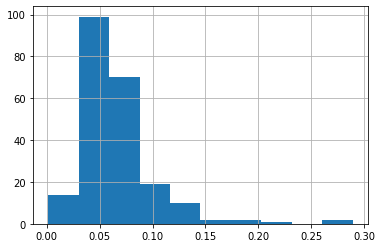

In [164]:
municipio_features['part_funcionarios_populacao_clt'].hist()

<AxesSubplot:>

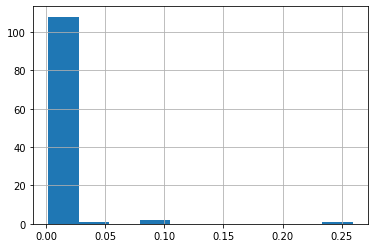

In [165]:
municipio_features['part_homicidio_uf'].hist()

<AxesSubplot:>

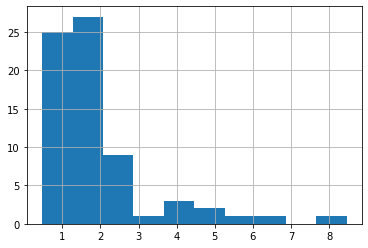

In [174]:
municipio_features[municipio_features['populacaoEstimada'] >= 10000]['part_homicidio_populacao10k'].hist()

<AxesSubplot:>

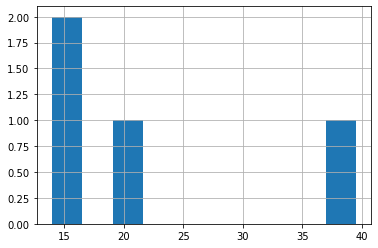

In [173]:
municipio_features[municipio_features['populacaoEstimada'] >= 100000]['part_homicidio_populacao100k'].hist()

<AxesSubplot:>

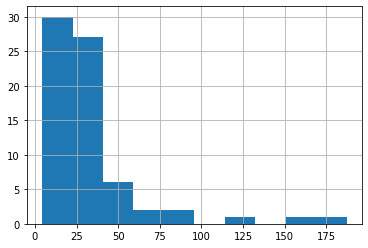

In [175]:
municipio_features[municipio_features['populacaoEstimada'] >= 10000]['part_homicidio_funcionario10k'].hist()

<AxesSubplot:>

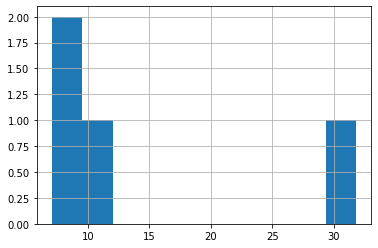

In [176]:
municipio_features[municipio_features['populacaoEstimada'] >= 100000]['part_homicidio_funcionario10k'].hist()

TODO
- dividir populacao por faixas

In [ ]:
# total number of rows and columns (features)
df.shape

In [ ]:
# data features comprehension
df.info()

In [ ]:
# summary statistics
df.describe()

In [ ]:
# to know variable categorical column values
df.<column_name>.unique()

In [ ]:
# counting column unique values
df.<column_name>.value_counts()

In [ ]:
dataframe_columns = df.columns

------------

# Conclusion